In [1]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(len(train_data)) # no of training data
print(len(test_data))  # no of testing data
print(train_data[0])   # content of the first training data
print(train_labels[0]) # labels: 0-45

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [3]:
# decoded the no to content
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# One-hot encoding by using a self-made functino
import numpy as np

# Vectorize the training data and testing data 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data)   # Vectorized test data
print(x_train)
print("--------------------------------------------")
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
--------------------------------------------
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [5]:
# Vectorize the labels in another function
# dimension is 46 as there are 45 labels
def vectorize_labels(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = vectorize_labels(train_labels)
one_hot_test_labels = vectorize_labels(test_labels)
print(one_hot_train_labels)
print("--------------------------------------------")
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
--------------------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# Another method to do vectorize the labels 
# Using to_categorical() 
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
# Define the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # input layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # output layer

In [8]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Validation set
x_val = x_train[:1000] # Validation dataset
partial_x_train = x_train[1000:] # Training dataset
y_val = one_hot_train_labels[:1000] # Validation label set
partial_y_train = one_hot_train_labels[1000:] # Training label set

In [10]:
# Start training the neural network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 213us/step - loss: 2.6029 - accuracy: 0.5323 - val_loss: 1.7014 - val_accuracy: 0.6540
Epoch 2/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.3848 - accuracy: 0.7078 - val_loss: 1.2979 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.0385 - accuracy: 0.7799 - val_loss: 1.1278 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.8187 - accuracy: 0.8235 - val_loss: 1.0340 - val_accuracy: 0.7710
Epoch 5/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.6607 - accuracy: 0.8592 - val_loss: 0.9659 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.5350 - accuracy: 0.8884 - val_loss: 0.9207 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 142us/step - loss

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

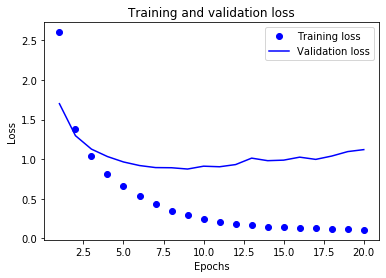

In [12]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

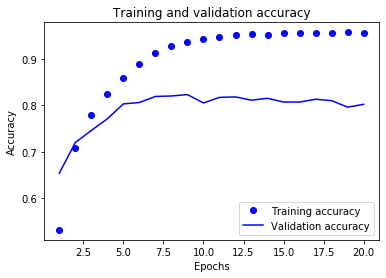

In [13]:
# Plot the training and validation accuracy
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# The network starts overfitting after epoch 8 (From the fig. Training and validation accuracy)
# Retrain the model for 8 epoch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)
# accuracy about 80%

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 225us/step - loss: 2.6433 - accuracy: 0.5312 - val_loss: 1.7423 - val_accuracy: 0.6450
Epoch 2/8
7982/7982 [==============================] - 1s 140us/step - loss: 1.4213 - accuracy: 0.6989 - val_loss: 1.3267 - val_accuracy: 0.7150
Epoch 3/8
7982/7982 [==============================] - 1s 127us/step - loss: 1.0627 - accuracy: 0.7704 - val_loss: 1.1528 - val_accuracy: 0.7630
Epoch 4/8
7982/7982 [==============================] - 1s 131us/step - loss: 0.8473 - accuracy: 0.8201 - val_loss: 1.0499 - val_accuracy: 0.7890
Epoch 5/8
7982/7982 [==============================] - 1s 141us/step - loss: 0.6714 - accuracy: 0.8604 - val_loss: 0.9858 - val_accuracy: 0.7950
Epoch 6/8
7982/7982 [==============================] - 1s 117us/step - loss: 0.5393 - accuracy: 0.8875 - val_loss: 0.9709 - val_accuracy: 0.8000
Epoch 7/8
7982/7982 [==============================] - 1s 157us/step - loss: 0.432

In [15]:
# Guess randomly
import copy # copy all the labels and data
test_labels_copy = copy.copy(y_val)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)/len(test_labels))

/home/cindy/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


0.0

In [16]:
# Predict the new data
predictions = model.predict(x_test)
print(predictions[0].shape)      # Each entry in predictions is a vector of length 46
print(np.sum(predictions[0]))    # The coefficents in the vector
print(np.argmax(predictions[0])) # Predicted class = 3

(46,)
1.0000001
3


In [17]:
# The importance of having sufficiently large intermedidate layers
# The following example: one of the intermediate layers have 4 units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))
# accuracy about 80%
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 207us/step - loss: 3.6264 - accuracy: 0.3285 - val_loss: 3.4016 - val_accuracy: 0.3770
Epoch 2/20
7982/7982 [==============================] - 1s 131us/step - loss: 3.2217 - accuracy: 0.4227 - val_loss: 3.0936 - val_accuracy: 0.4060
Epoch 3/20
7982/7982 [==============================] - 1s 140us/step - loss: 2.8908 - accuracy: 0.4178 - val_loss: 2.8250 - val_accuracy: 0.4140
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 2.6122 - accuracy: 0.4633 - val_loss: 2.6247 - val_accuracy: 0.4900
Epoch 5/20
7982/7982 [==============================] - 1s 132us/step - loss: 2.4107 - accuracy: 0.4816 - val_loss: 2.4899 - val_accuracy: 0.4890
Epoch 6/20
7982/7982 [==============================] - 1s 137us/step - loss: 2.2768 - accuracy: 0.4833 - val_loss: 2.4304 - val_accuracy: 0.4230
Epoch 7/20
7982/7982 [==============================] - 1s 136us/step - loss

In [18]:
# Further experiments
# Use 128 units in a layer, instead of 64
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val,y_val))
# accuracy is higher with layer has 64 units (80% --> 95%)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 252us/step - loss: 2.2142 - accuracy: 0.5569 - val_loss: 1.4180 - val_accuracy: 0.6840
Epoch 2/9
7982/7982 [==============================] - 2s 197us/step - loss: 1.1340 - accuracy: 0.7463 - val_loss: 1.0970 - val_accuracy: 0.7650
Epoch 3/9
7982/7982 [==============================] - 2s 191us/step - loss: 0.8017 - accuracy: 0.8235 - val_loss: 0.9660 - val_accuracy: 0.7960
Epoch 4/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.5741 - accuracy: 0.8821 - val_loss: 0.8959 - val_accuracy: 0.8090
Epoch 5/9
7982/7982 [==============================] - 2s 196us/step - loss: 0.4301 - accuracy: 0.9100 - val_loss: 0.8611 - val_accuracy: 0.8110
Epoch 6/9
7982/7982 [==============================] - 2s 201us/step - loss: 0.3238 - accuracy: 0.9322 - val_loss: 0.8404 - val_accuracy: 0.8200
Epoch 7/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.254

In [19]:
# Further experiments
# Use 256 units in one layer, instead of 64 and 127 units
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
# accuracy does not rise very much that 128 units in one layer
# We should use appropriate number of units in one layer in order to obtain the best result
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 521us/step - loss: 1.9828 - accuracy: 0.5722 - val_loss: 1.2949 - val_accuracy: 0.7080
Epoch 2/9
7982/7982 [==============================] - 3s 331us/step - loss: 0.9678 - accuracy: 0.7825 - val_loss: 0.9975 - val_accuracy: 0.7880
Epoch 3/9
7982/7982 [==============================] - 3s 324us/step - loss: 0.6148 - accuracy: 0.8659 - val_loss: 0.8778 - val_accuracy: 0.8130
Epoch 4/9
7982/7982 [==============================] - 3s 335us/step - loss: 0.4205 - accuracy: 0.9094 - val_loss: 0.8585 - val_accuracy: 0.8150
Epoch 5/9
7982/7982 [==============================] - 3s 344us/step - loss: 0.2799 - accuracy: 0.9367 - val_loss: 0.9425 - val_accuracy: 0.7980
Epoch 6/9
7982/7982 [==============================] - 3s 342us/step - loss: 0.2224 - accuracy: 0.9442 - val_loss: 0.9165 - val_accuracy: 0.7970
Epoch 7/9
7982/7982 [==============================] - 3s 334us/step - loss: 0.185

In [20]:
# Further experiments
# Use 32 units in one layer
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
# Accuracy is lower than 64 units layer and 128 units layers 
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 170us/step - loss: 3.1057 - accuracy: 0.3854 - val_loss: 2.4113 - val_accuracy: 0.5700
Epoch 2/9
7982/7982 [==============================] - ETA: 0s - loss: 2.0077 - accuracy: 0.64 - 1s 114us/step - loss: 2.0023 - accuracy: 0.6422 - val_loss: 1.7255 - val_accuracy: 0.6500
Epoch 3/9
7982/7982 [==============================] - 1s 103us/step - loss: 1.4568 - accuracy: 0.7022 - val_loss: 1.4072 - val_accuracy: 0.6880
Epoch 4/9
7982/7982 [==============================] - 1s 151us/step - loss: 1.1619 - accuracy: 0.7508 - val_loss: 1.2376 - val_accuracy: 0.7240
Epoch 5/9
7982/7982 [==============================] - 1s 163us/step - loss: 0.9727 - accuracy: 0.7959 - val_loss: 1.1410 - val_accuracy: 0.7590
Epoch 6/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.8332 - accuracy: 0.8246 - val_loss: 1.0868 - val_accuracy: 0.7720
Epoch 7/9
7982/7982 [===================

In [21]:
# Further experiments
# Use 3 hidden layer
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 304us/step - loss: 2.7224 - accuracy: 0.4305 - val_loss: 1.7222 - val_accuracy: 0.6420
Epoch 2/9
7982/7982 [==============================] - 2s 205us/step - loss: 1.4648 - accuracy: 0.6914 - val_loss: 1.3647 - val_accuracy: 0.7030
Epoch 3/9
7982/7982 [==============================] - 2s 197us/step - loss: 1.1068 - accuracy: 0.7538 - val_loss: 1.1926 - val_accuracy: 0.7210
Epoch 4/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.8783 - accuracy: 0.8043 - val_loss: 1.0855 - val_accuracy: 0.7540
Epoch 5/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.7008 - accuracy: 0.8485 - val_loss: 1.0261 - val_accuracy: 0.7740
Epoch 6/9
7982/7982 [==============================] - 1s 160us/step - loss: 0.5566 - accuracy: 0.8825 - val_loss: 0.9704 - val_accuracy: 0.7930
Epoch 7/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.438